# Premier traitement des données, création des cartes et quelques analyses

### Importation des librairies nécessaires et des données

In [2]:
#on charge le dataset et on le met dans un dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
from folium.plugins import HeatMap, MarkerCluster, FeatureGroupSubGroup
import folium
df = pd.read_csv('Data.csv', sep=',', low_memory=False)

### Création du dataframe et traitement de préparation pour les analyses

In [3]:
# On ne peut pas garder toutes les colonnes, un choix s'opère donc. On garde les colonnes qui nous semblent les plus pertinentes pour notre étude.
# Data, dataframe général, possédant "eventid","latitude","longitude","iyear","imonth","iday","extended","resolution","country_txt","region_txt","provstate","city","success", "suicide","attacktype1_txt", "targtype1_txt","targsubtype1_txt","natlty1_txt","gname","nperps","claimed","weaptype1_txt","weapsubtype1_txt","nkill","nwound","dbsource"
Data = df[["eventid","iyear","imonth","latitude","longitude","iday","extended","resolution","country_txt","region_txt","provstate","city","success", "suicide","attacktype1_txt", "targtype1_txt","targsubtype1_txt","natlty1_txt","gname","nperps","claimed","weaptype1_txt","weapsubtype1_txt","nkill","nwound","dbsource"]]

# Visualisation des données manquantes
#print (Data.isna().sum()/len(Data)*100)

# Passer 'claimed' à 0 quand la valeur est manquante 
Data['claimed'].fillna(0,inplace=True)
#Passer 'nperps' à 1 quand la valeur est manquante
Data['nperps'].fillna(1,inplace=True)

#Passer 'targsubtype1_txt', 'natlty1_txt', 'country_txt' et 'weapsubtype1_txt' à 'Unknown' quand NaN
Data['targsubtype1_txt'].fillna('Unknown',inplace=True)
Data['natlty1_txt'].fillna('Unknown',inplace=True)
Data['weapsubtype1_txt'].fillna('Unknown',inplace=True)
Data['country_txt'].fillna('Unknown',inplace=True)

#on remplace les valeurs vides de la colonne resolution par la date de l'attentat dans le format "jour/mois/année"
Data['resolution'].fillna(Data['iday'].astype(str) + "/" + Data['imonth'].astype(str) + "/" + Data['iyear'].astype(str),inplace=True)

#Vérification du traitement des données manquantes
print (Data.isna().sum()/len(Data)*100)

# Drop le reste des nan
Data.dropna(inplace=True)

Data.to_csv("Trait2.csv")


eventid             0.000000
iyear               0.000000
imonth              0.000000
latitude            2.507554
longitude           2.508104
iday                0.000000
extended            0.000000
resolution          0.000000
country_txt         0.000000
region_txt          0.000000
provstate           0.231712
city                0.238867
success             0.000000
suicide             0.000000
attacktype1_txt     0.000000
targtype1_txt       0.000000
targsubtype1_txt    0.000000
natlty1_txt         0.000000
gname               0.000000
nperps              0.000000
claimed             0.000000
weaptype1_txt       0.000000
weapsubtype1_txt    0.000000
nkill               5.676120
nwound              8.977330
dbsource            0.000000
dtype: float64


## Analyses et graphes

### Première analyse des données fonctionnelle

In [4]:
# On regarde le nombre de d'attentats revendiqués par rapport au nombre total 

Revendiqué = df[["claimed"]]

#On récupère le nombre de ligne ou la colonne "claimed" est égale à 1 dans la variable "count"

count = Revendiqué[Revendiqué.claimed == 1].count()

#On récupère le nombre de ligne total dans la variable "count2"

count2 = Revendiqué.count()

#On calcule le pourcentage de ligne ou la colonne "claimed" est égale à 1

pourcentage = (count/count2)*100

print(pourcentage)


claimed    16.445302
dtype: float64


### Graphe par année

[[651], [471], [568], [473], [581], [740], [923], [1319], [1526], [2662], [2662], [2586], [2544], [2870], [3495], [2915], [2860], [3183], [3721], [4324], [3887], [4683], [5071], [3456], [3081], [3058], [3197], [934], [1395], [1814], [1906], [1333], [1278], [1166], [2017], [2758], [3242], [4805], [4721], [4826], [5076], [8522], [12036], [16903], [14965], [13587], [10900]]


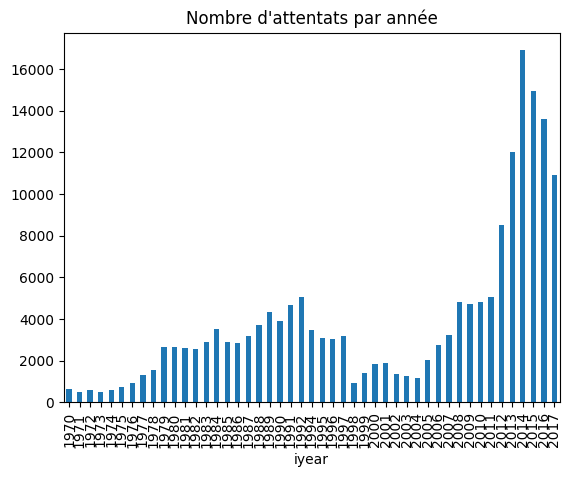

In [5]:
 # On regarde le nombre d'attentats par année pour voir comment évolue le terrorisme au fil des années

#On récupère le nombre d'attentats par année dans la variable "YearCount"

YearCount = df[["eventid","iyear"]].groupby('iyear').count()

#On affiche le bar chart du nombre d'attentats par année

YearCount.plot(kind='bar', legend=False, title="Nombre d'attentats par année")

#On créer une liste qui contient le nombre d'attentats par année pour chaque année

YearCountList = YearCount.values.tolist()

print(YearCountList)

### Graphe des types d'armes utilisées

[[92426], [58524], [15157], [11135], [3655], [321], [141], [136], [114], [35], [33], [14]]


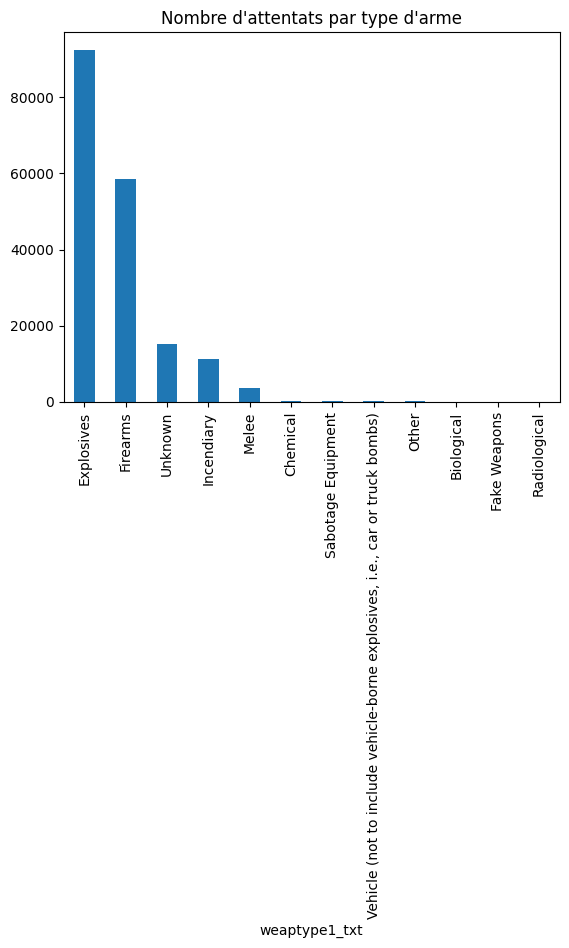

In [18]:
# On range le nombre d'occurences de chaque weaptype1_txt en ordre décroissant dans un bar chart

#On récupère le nombre d'attentats par type d'arme dans la variable "WeaponCount"

WeaponCount = df[["eventid","weaptype1_txt"]].groupby('weaptype1_txt').count()

#Tri décroissant

WeaponCount = WeaponCount.sort_values(by='eventid', ascending=False)

#On affiche le bar chart du nombre d'attentats par type d'arme

WeaponCount.plot(kind='bar', legend=False, title="Nombre d'attentats par type d'arme")

#On crée une liste qui contient le nombre d'attentats par type d'arme pour chaque type d'arme

WeaponCountList = WeaponCount.values.tolist()

print(WeaponCountList)




### Graphes des types d'attaques

[[88255], [42669], [19312], [11158], [10356], [7276], [1015], [991], [659]]


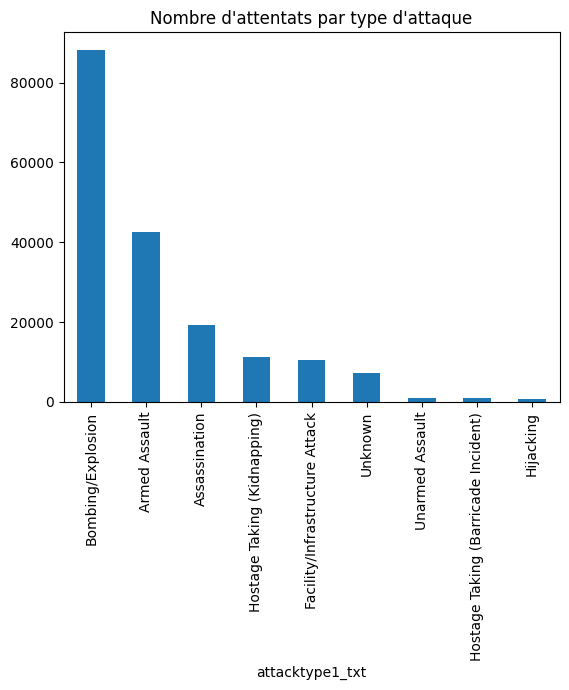

In [19]:
# On range le nombre d'occurences de chaque attacktype1_txt en ordre décroissant dans un bar chart

#On récupère le nombre d'attentats par type d'attaque dans la variable "AttackCount"

AttackCount = df[["eventid","attacktype1_txt"]].groupby('attacktype1_txt').count()

#Tri décroissant

AttackCount = AttackCount.sort_values(by='eventid', ascending=False)

#On affiche le bar chart du nombre d'attentats par type d'attaque dans l'ordre décroissant

AttackCount.plot(kind='bar', legend=False, title="Nombre d'attentats par type d'attaque")

#On crée une liste qui contient le nombre d'attentats par type d'attaque pour chaque type d'attaque

AttackCountList = AttackCount.values.tolist()

print(AttackCountList)

### Graphes des sous-types d'armes

[[44980], [33137], [17412], [9900], [9848], [7304], [6704], [5167], [4251], [4141], [3245], [2719], [2585], [1594], [1239], [1222], [1175], [844], [792], [625], [587], [548], [231], [219], [107], [103], [86], [83], [65], [10]]


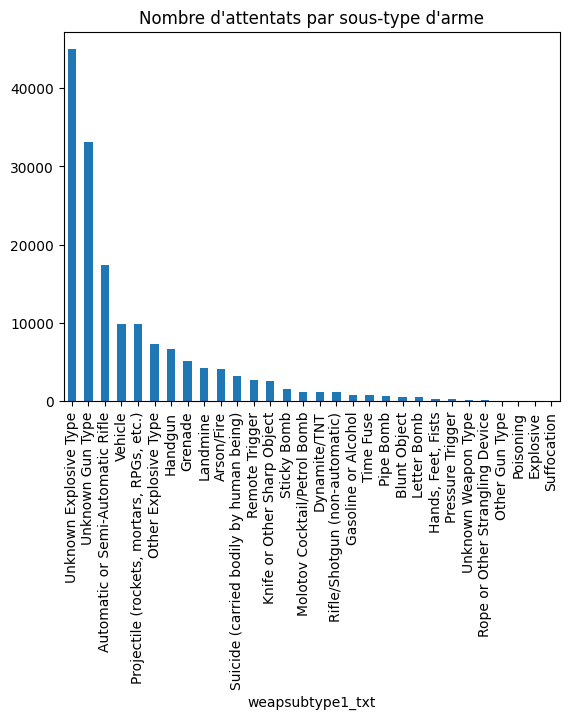

In [21]:
# On range le nombre de chaque sous-type d'arme en ordre décroissant dans un bar chart

#On récupère le nombre d'attentats par sous-type d'arme dans la variable "WeaponSubCount"

WeaponSubCount = df[["eventid","weapsubtype1_txt"]].groupby('weapsubtype1_txt').count()

#Tri décroissant

WeaponSubCount = WeaponSubCount.sort_values(by='eventid', ascending=False)

#On affiche le bar chart du nombre d'attentats par sous-type d'arme dans l'ordre décroissant

WeaponSubCount.plot(kind='bar', legend=False, title="Nombre d'attentats par sous-type d'arme")

#On crée une liste qui contient le nombre d'attentats par sous-type d'arme pour chaque sous-type d'arme

WeaponSubCountList = WeaponSubCount.values.tolist()

print(WeaponSubCountList)

### Graphe par pays

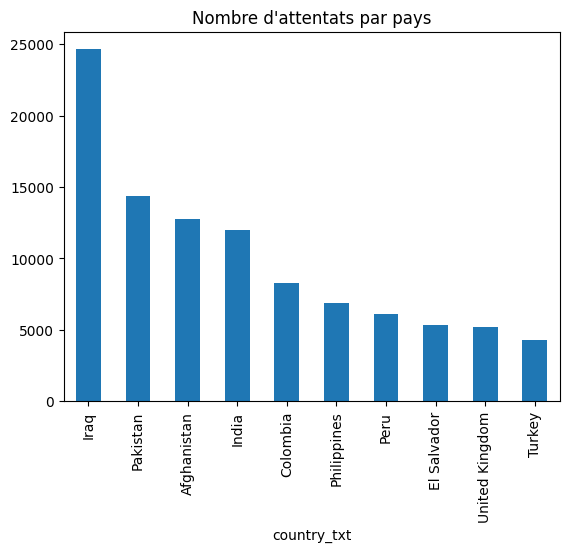

In [6]:
# On regarde le nombre d'attentats par pays pour voir quel pays est le plus touché

# On récupère le nombre d'attentats par pays dans la variable "CountryCount"

CountryCount = df[["eventid","country_txt"]].groupby('country_txt').count()

# on trie les pays par ordre décroissant de nombre d'attentats

CountryCount = CountryCount.sort_values(by='eventid', ascending=False)

# on crée un bar chart du nombre d'attentats par pays pour les 10 pays les plus touchés

CountryCount.head(10).plot(kind='bar', legend=False, title="Nombre d'attentats par pays")

# on crée un dataframe qui contient le nom des pays et le nombre d'attentats pour tous les pays

CountryRisk = pd.DataFrame(CountryCount)

CountryRisk.to_csv("CountryRisk.csv")



## Les cartes

### Carte rassemblant tous les attentats en clusters (cartouche à exécution longue)

In [7]:
# créer la carte centrée sur la position moyenne des événements
map = folium.Map(location=[Data['latitude'].mean(), Data['longitude'].mean()], zoom_start=4)

# créer un groupe de marqueurs clusterisés
marker_cluster = MarkerCluster().add_to(map)

# ajouter un marqueur pour chaque événement dans le groupe de marqueurs clusterisés
for index, row in Data.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']]).add_to(marker_cluster)

# créer un groupe pour afficher le nombre de marqueurs dans chaque cluster
sub_group = folium.plugins.FeatureGroupSubGroup(marker_cluster, 'Events Count')

# ajouter le groupe à la carte
map.add_child(sub_group)

# ajouter un compteur pour chaque cluster
for i, layer in enumerate(marker_cluster._children.values()):
    count = len(layer._children)
    bounds = layer.get_bounds()
    pos = [(bounds[0][0] + bounds[1][0]) / 2, (bounds[0][1] + bounds[1][1]) / 2]
    folium.Marker(location=pos, icon=folium.Icon(icon='info-sign'), tooltip=str(count)).add_to(sub_group)

map.save("GlobalMap.html")
print('Global map created')

### Heatmaps par continent

In [8]:
def create_heatmap_for_region(region_data, region_name):
    # Créer une carte centrée sur les coordonnées moyennes de la région
    map_center = [region_data['latitude'].mean(), region_data['longitude'].mean()]
    region_map = folium.Map(location=map_center, zoom_start=4)

    # Préparez les données pour la heatmap
    heat_data = [[row['latitude'], row['longitude']] for index, row in region_data.iterrows()]

    # Ajoutez la heatmap à la carte
    HeatMap(heat_data).add_to(region_map)

    # Sauvegarder la heatmap dans un fichier HTML
    region_map.save(f'{region_name}_heatmap.html')

    print(f'{region_name} heatmap created')


In [9]:
regions = Data['region_txt'].unique()
for region in regions:
    region_data = Data[Data['region_txt'] == region]
    create_heatmap_for_region(region_data, region)


North America heatmap created
Southeast Asia heatmap created
South America heatmap created
Western Europe heatmap created
Central America & Caribbean heatmap created
Middle East & North Africa heatmap created
Eastern Europe heatmap created
Australasia & Oceania heatmap created
South Asia heatmap created
Sub-Saharan Africa heatmap created
East Asia heatmap created
Central Asia heatmap created


### Cartes des attentats par continent (exécution longue)

In [10]:
# Crée une carte par continent, visant à afficher chaque attentat et son nombre de victimes en cliquant dessus
def create_map_for_region(region_data, region_name):
    # Crée une carte centrée sur les coordonnées moyennes de la région
    map_center = [region_data['latitude'].mean(), region_data['longitude'].mean()]
    region_map = folium.Map(location=map_center, zoom_start=4)

    # Ajoute un marqueur pour chaque événement
    for index, row in region_data.iterrows():
        folium.Marker(location=[row['latitude'], row['longitude']],
                      popup=f'Victims: {row["nkill"] + row["nwound"]}').add_to(region_map)

    # Sauvegarde la carte dans un fichier HTML
    region_map.save(f'{region_name}_map.html')

    print(f'{region_name} map created')


In [11]:
regions = Data['region_txt'].unique()
for region in regions:
    region_data = Data[Data['region_txt'] == region]
    create_map_for_region(region_data, region)


North America map created
Southeast Asia map created
South America map created
Western Europe map created
Central America & Caribbean map created
Middle East & North Africa map created
Eastern Europe map created
Australasia & Oceania map created
South Asia map created
Sub-Saharan Africa map created
East Asia map created
Central Asia map created


### Heatmap globale

In [12]:
# Création d'une heatmap mondiale

def create_global_heatmap(data):
    # Créer une carte centrée sur les coordonnées moyennes de la région
    map_center = [data['latitude'].mean(), data['longitude'].mean()]
    global_map = folium.Map(location=map_center, zoom_start=4)

    # Préparez les données pour la heatmap
    heat_data = [[row['latitude'], row['longitude']] for index, row in data.iterrows()]

    # Ajoutez la heatmap à la carte
    HeatMap(heat_data).add_to(global_map)

    # Sauvegarder la heatmap dans un fichier HTML
    global_map.save('global_heatmap.html')

    print('Global heatmap created')


create_global_heatmap(Data)



Global heatmap created
